# Exercícios de fixação

Esses 2 exercícios são mais exploratórios e portanto não há uma resposta única correta. O importante é exercitar o que foi aprendido, ficar confortável em modificar o código e analisar criticamente os resultados. Além disso, vamos tentar fazer o código de uma forma modularizada para evitar que temos que ficar repetindo a mesma coisa e possivelmente introduzir erros.


## 1 - Repita a análise acima para diferentes números de clusters, tal como k=2 e k=6. Varie a densidade de pontos.

In [0]:
# Importando as bibliotecas que vamos utilizar
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

from scipy.spatial.distance import cdist

Como vamos realizar o mesmo procedimento de análise várias vezes, podemos definir nosso procedimento em uma função e reutilizar posteriormente somente variando os parametros necessários.

In [0]:
def clusterize_and_plot(data, k, print_scores=True):
    """
    Esta função tem como objetivo clusterizar os dados passados e aprensentar o resultado final.
    Para clusterizar usamos os algoritmos KMeans e AgglomerativeClustering.
    Opcionalmente, é possível imprimir os score das seguintes métricas de avalição:
    Adjusted Rand Score, Mutual Information Score, Silhouette Score.
    """

    # Mudando o cluster_std, temos agrupamentos mais "fechados"
    X = data[0] # atributos das observacoes
    labels_true = data[1] # classe conhecida inicialmente

    plt.figure(figsize=(20,5))
    
    # mostra os dados
    plt.subplot(1, 3, 1)
    plt.scatter(X[:,0], X[:,1], c=labels_true, cmap='viridis', s=50, alpha=0.9)
    plt.title(f"Dados originais ({len(X)} exemplos)")

    # mostra o kmeans
    kmeans = KMeans(n_clusters=k)
    labels_pred_km = kmeans.fit_predict(X)
    plt.subplot(1, 3, 2)
    plt.scatter(X[:,0], X[:,1], c=labels_pred_km, cmap='viridis', s=50)
    plt.title('KMeans')

    # mostra o agglomerative
    clustering = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels_pred_ac = clustering.fit_predict(X)
    plt.subplot(1, 3, 3)
    plt.scatter(X[:,0], X[:,1], c=labels_pred_ac, cmap='viridis', s=50)
    plt.title('Agglomerative Clustering: Single Linkage')
    plt.show(True)

    # Verifica se queremos imprimir o resultado das comparações
    if print_scores:
        print('KMeans:')
        print('Adjusted Rand Score:', adjusted_rand_score(labels_true, labels_pred_km))
        print('Mutual Information Score:', normalized_mutual_info_score(labels_true, labels_pred_km))
        print('Silhouette Score:', silhouette_score(X, labels_pred_km, metric='euclidean'))
        print('\n')

        print('Agrupamento Hierárquico - Single Linkage:')
        print('Adjusted Rand Score:', adjusted_rand_score(labels_true, labels_pred_ac))
        print('Mutual Information Score:', normalized_mutual_info_score(labels_true, labels_pred_ac))
        print('Silhouette Score:', silhouette_score(X, labels_pred_ac, metric='euclidean'))

    # Retornamos os dados para poder usar eles depois
    return X, labels_true


Vamos testar com 6 centros e agrupamentos bem "fechados" (baixo desvio padrão):


In [0]:
n_samples = 200
n_features = 2
random_state = 50

# Mudando o cluster_std, temos agrupamentos mais "fechados"
data = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=6, cluster_std=0.3, random_state=random_state)

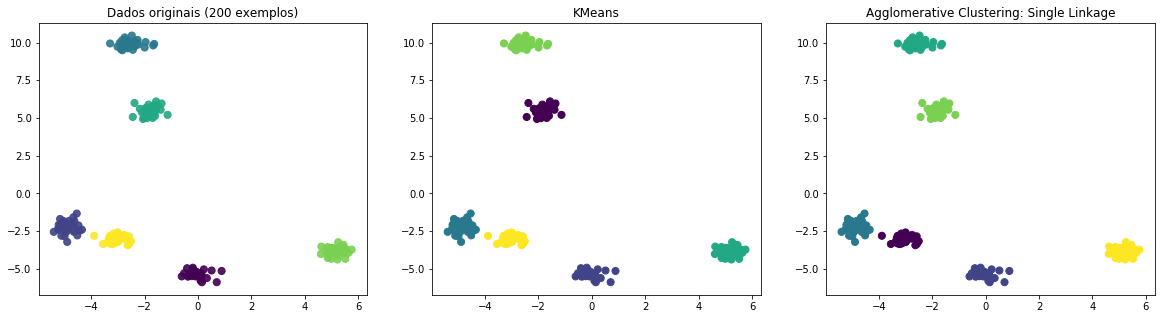

KMeans:
Adjusted Rand Score: 1.0
Mutual Information Score: 1.0
Silhouette Score: 0.8346845904270336


Agrupamento Hierárquico - Single Linkage:
Adjusted Rand Score: 1.0
Mutual Information Score: 1.0
Silhouette Score: 0.8346845904270336


In [13]:
X, labels = clusterize_and_plot(data, 6)

Podemos perceber que pelo fato dos grupos estarem longes um do outro, é fácil para os dois algoritmos identificarem os melhores clusters.

Além do mais, uma análise do melhor valor de K pelo normalized mutual informationde deve nos fornecer o valor esperado de 6 devido a facilidade do problema:


In [0]:
def optimal_k(X, labels_true):
    """
    Esta função tem como objetivo encontrar o melhor valor de K baseado na métrica NMI.
    """
    all_nmi_km = []
    all_nmi_ac = []
    all_k = range(1, 20)

    # testamos o KMeans e o AgglomerativeClustering para diferentes valores de k
    for k in all_k:
        kmeans = KMeans(n_clusters=k)
        labels_pred_km = kmeans.fit_predict(X)
        nmi_km = normalized_mutual_info_score(labels_true, labels_pred_km)
        all_nmi_km.append(nmi_km)

        clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels_pred_ac = clustering.fit_predict(X)
        nmi_ac = normalized_mutual_info_score(labels_true, labels_pred_ac)
        all_nmi_ac.append(nmi_ac)
      
    # apresentamos o resultado do NMI para cada valor de k nos dois algoritmos
    plt.figure(figsize=(10, 5))
    plt.plot(all_k, all_nmi_km, '-bo', label='KMeans')
    plt.plot(all_k, all_nmi_ac, '-ro', label='Hierarchical (Ward)')
    plt.xlabel('k', fontsize=15)
    plt.ylabel('Normalized Mutual Information', fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.show()

Note que no plot abaixo, o maior valor calculado pelo NMI foi com $k=6$ para os dois algoritmos, assim como esperado.

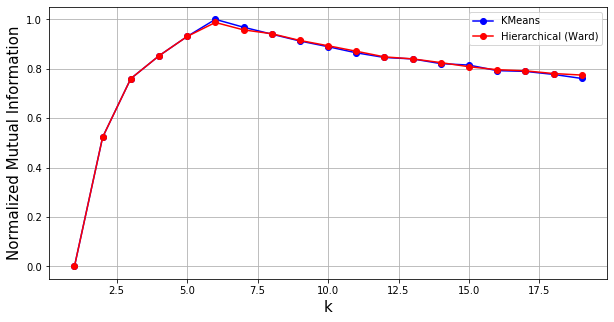

In [15]:
optimal_k(X, labels)

Vamos agora testar com apenas 2 centros e dados com bastante sobreposição (alto desvio padrão):


In [0]:
# Mantemos o mesmo numero de sampels e features do exemplo anterior

# Aqui vemos a vantagem de ter feito uma função
data = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=2, cluster_std=4, random_state=random_state)

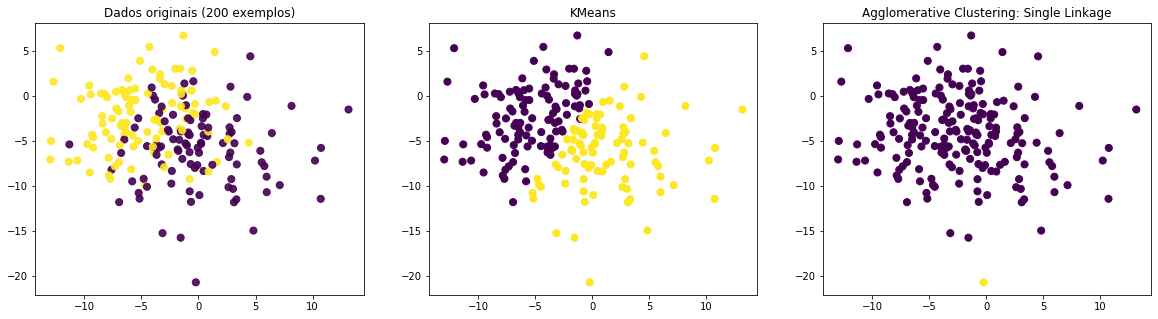

KMeans:
Adjusted Rand Score: 0.3101681733245795
Mutual Information Score: 0.2440715215161004
Silhouette Score: 0.3329478772231495


Agrupamento Hierárquico - Single Linkage:
Adjusted Rand Score: 0.0
Mutual Information Score: 0.009600256094804405
Silhouette Score: 0.5211895629882407


In [17]:
X, labels = clusterize_and_plot(data, 2)

Os resultados foram bem piores - a sobreposição dos dois centros significa que não há uma maneira fácil de definir os grupos de forma que acertamos todos;

Além disso, o agrupamento hierárquico não identificou que deveriam ser 2 clusters.

Vamos analisar qual seria o comportamento do normalized mutual information conforme variamos nosso K:

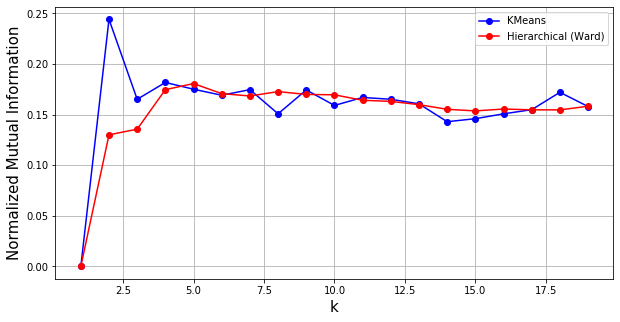

In [18]:
optimal_k(X, labels)

Percebemos que o agrupamento hierárquico não converge para a mesma resposta de melhor K quando analisando o NMI, devido ao problema ser mais difícil pela sobreposição dos dados. Já o KMeans, apresenta o maior score quando $k=2$, mas ainda assim não é expressivo para aceitarmos como melhor $k$.

## 2 - Repita a análise para dados gerados usando a função make_circles (https://scikit-learn.org/stable/datasets/index.html#sample-generators). Varie o número de observações e veja como se comporta o agrupamento.

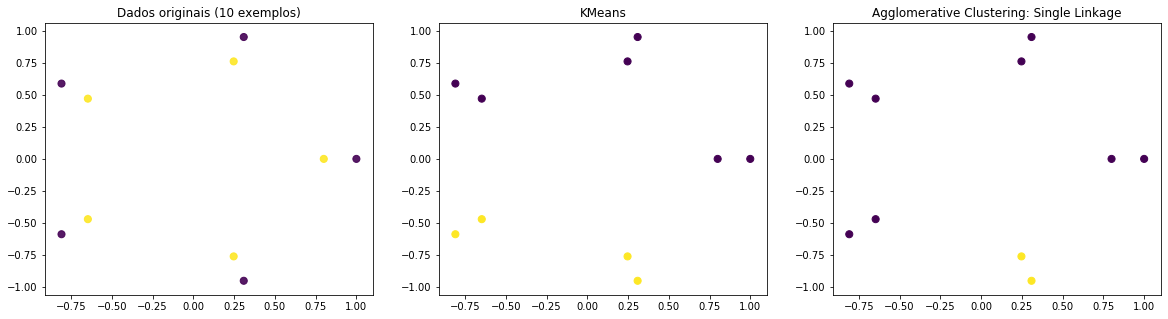

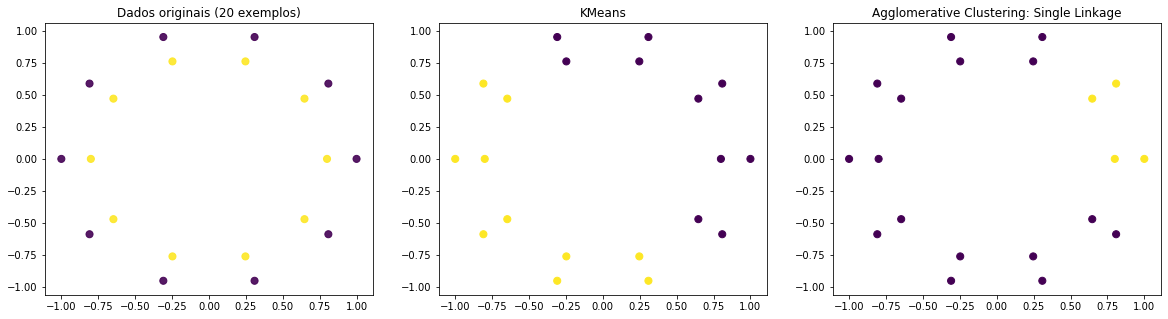

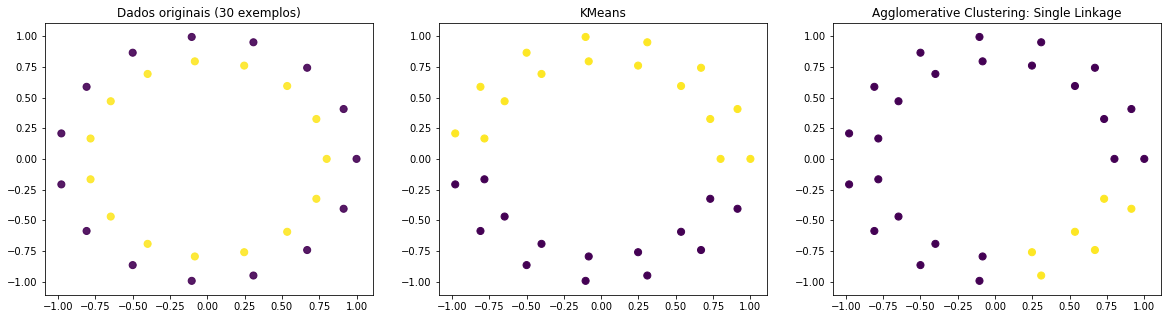

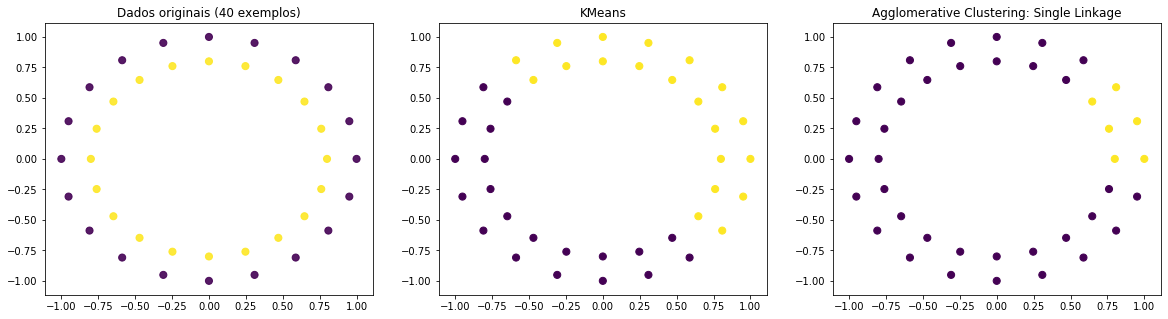

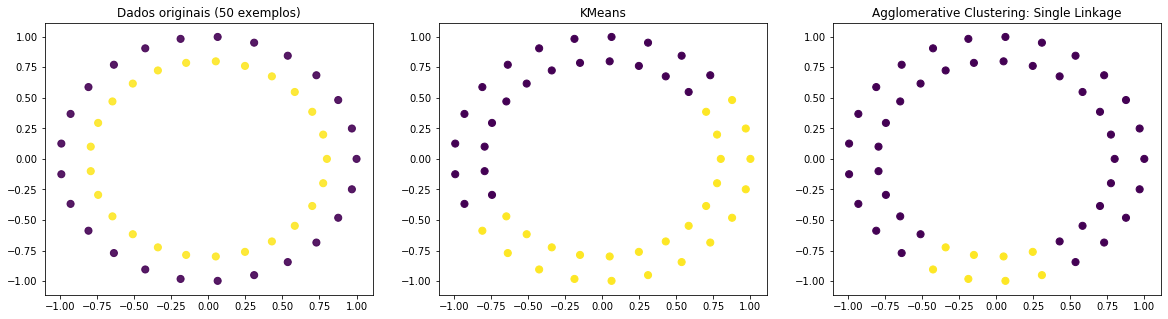

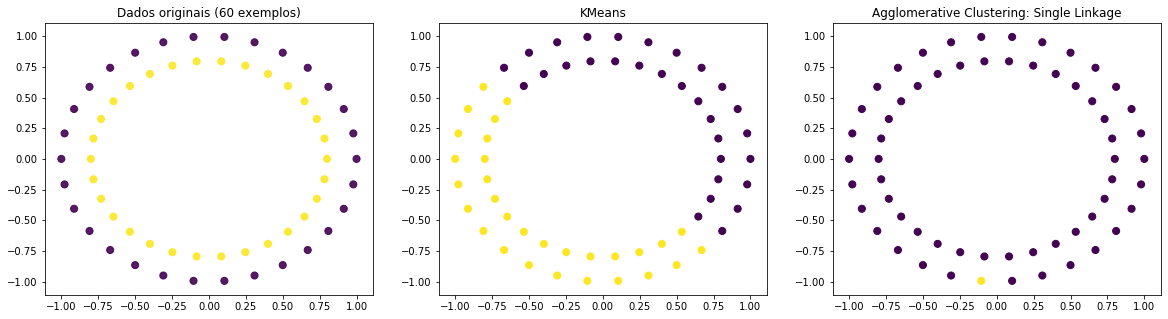

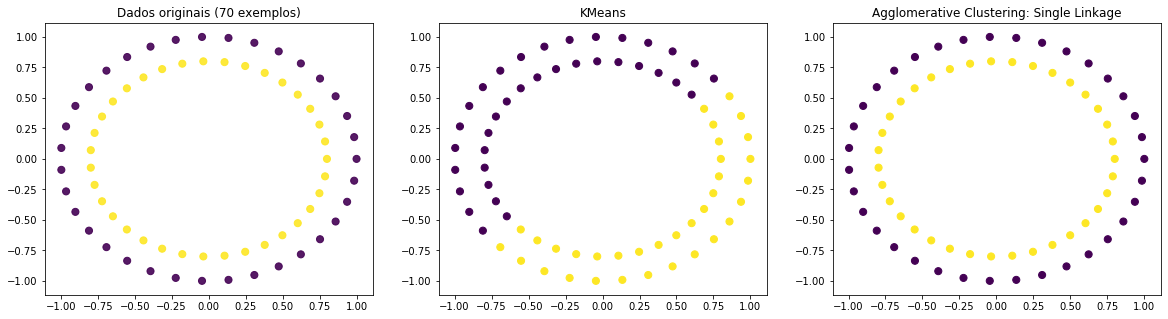

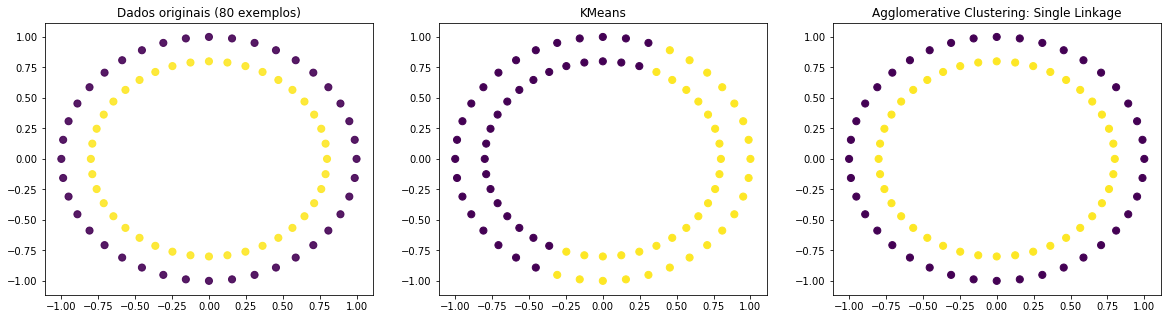

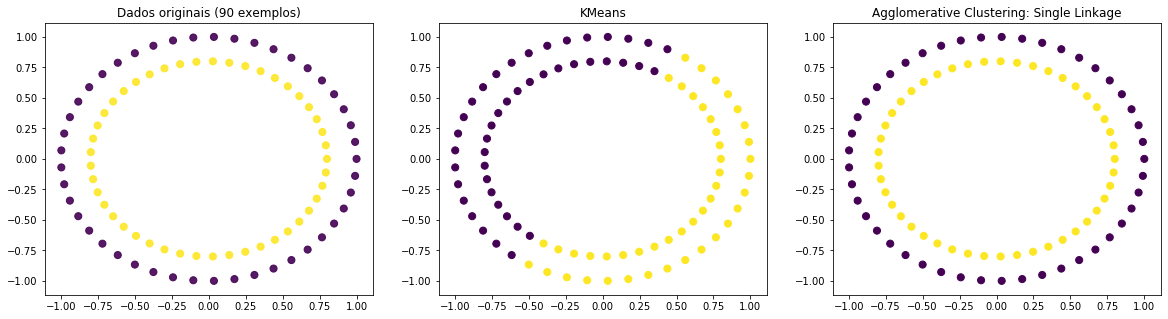

In [20]:
random_state = 50

for n_samples in range(10, 100, 10):
    # Mudando o cluster_std, temos agrupamentos mais "fechados"
    data = make_circles(n_samples=n_samples, random_state=random_state)
    # Novamente percebemos a vantagem de ter feito o código em funções
    clusterize_and_plot(data, 2, print_scores=False)

Percebemos que a partir de 70 exemplos, o agrupamento hierárquico começa a acertar, enquanto o K-means continua sempre errando - de fato, devido a estrutura dos dados, o K-means nunca vai conseguir achar um bom comportamento.

Bonus: No final dessa matéria (aula 8) veremos como o modelo SVM, para classificação de dados, utiliza uma técnica chamada kernel que também poderia ser utilizada para melhorar o agrupamento do k-means.